# Final Project 

In [1]:
import nltk
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd
import  numpy as np
from PIL import Image
import requests
import json
import re
import string

from pprint import pprint
from tkinter import *
from translate import Translator
from deep_translator import GoogleTranslator
from googletrans import Translator
import fasttext
import warnings
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet




In [2]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/anak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/anak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

In [5]:
warnings.filterwarnings("ignore")

In [6]:
data=pd.read_csv('reviewsVichy2.csv')
print(data.shape)

(164, 3)


In [7]:
data.head()

,title,stars,comment
0,\n\n\n\n\n\n\n\n \n \n Excelente\n \n,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Excelente\...
1,\n\n\n\n\n\n\n\n \n Excelente producto. Gr...,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n Ideal para usa...
2,\n\n\n\n\n\n\n\n \n Amei o produto\n \n \n,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n Produto ótimo\...
3,\n\n\n\n\n\n\n\n \n \n Great product but ...,1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Half bottl...
4,\n\n\n\n\n\n\n\n \n \n I loved it\n \n,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Love it\n\...


# Basic Cleaning

In [8]:
data = data.dropna()
data.drop_duplicates(keep = False, inplace = True)

In [9]:
data.shape

(160, 3)

In [10]:
# remove newline
data['title'] = data['title'].replace("n",'')
data['stars'] = data['stars'].replace(re.compile(r'\\n'),'')

In [11]:
#OPTIMIZEEEEEE
# To prepare each column  and take only the score in stars

for i in range(0,len(data['title'])):
     data['title'].iloc[i]=data['title'].iloc[i].replace('\n',"").replace('-'," ").strip()


for i in range(0,len(data['title'])):
     data['comment'].iloc[i]=data['comment'].iloc[i].replace('\n',"").replace('-'," ").strip()
     

for i in range(0,len(data['title'])):
    a=(data['stars'].iloc[i])
    data['stars'].iloc[i] = int(a[0])


In [12]:
#OPTIMIZEEEEEE

def remove_emojis(data):
    emoj = re.compile("["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002702-\U000027B0"
        "\U00002702-\U000027B0"
        #"\U000024C2-\U0001F251" #chinese characters
        "\U0001f926-\U0001f937"
        "\U00010000-\U0010ffff"
        "\u2640-\u2642" 
        "\u2600-\u2B55"
        "\u200d"
        "\u23cf"
        "\u23e9"
        "\u231a"
        "\ufe0f"  # dingbats
        "\u3030"
                      "]+", re.UNICODE)
     
    return re.sub(emoj, '', data)


for i in range(0,len(data['title'])):
    data['title'].iloc[i]=remove_emojis(data['title'].iloc[i])


for i in range(0,len(data['comment'])):
    data['comment'].iloc[i]=remove_emojis(data['comment'].iloc[i])


In [13]:
data.head()

,title,stars,comment
0,Excelente,5,Excelente
1,Excelente producto. Gracias.,5,Ideal para usarlo post. Peeling químico ya que...
2,Amei o produto,5,Produto ótimo
3,Great product but cheap packing,1,Half bottle and the spray broke.
4,I loved it,5,Love it


# Filtering English Title/Comments

In [14]:
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.99 Safari/537.36'

translator = Translator()



for i in range(0,len(data['title'])):
    translation = translator.translate(data['title'].iloc[i],dest='English')
    data['title'].iloc[i] = translation



for i in range(0,len(data['comment'])):
    translation = translator.translate(data['comment'].iloc[i],dest='English')
    data['comment'].iloc[i] = translation

In [15]:
# Fastext - library
model = fasttext.load_model('lid.176.ftz')
s=[]

for i in range(0,len(data['title'])):
    a=model.predict(data['title'].iloc[i], k=1)
    s.append(a[-2][-1][-2:])

In [16]:
s2=[]
model = fasttext.load_model('lid.176.ftz')
for i in range(0,len(data['title'])):
    b=model.predict(data['comment'].iloc[i], k=1)
    s2.append(b[-2][-1][-2:])



In [17]:
data_trans=pd.DataFrame()
title=[]
comment=[]
stars=[]
for i in range(0,len(s)):

    if s[i]== "en" and s2[i]=='en' :
        title.append(data['title'].iloc[i])
        comment.append(data['comment'].iloc[i])
        stars.append(data['stars'].iloc[i])

data_trans['stars']=stars
data_trans['title']=title
data_trans['comment']=comment


In [18]:
data_trans.head()

,stars,title,comment
0,1,Great product but cheap packing,Half bottle and the spray broke.
1,5,I loved it,Love it
2,5,"excellent water, the face after it is fresh",Good
3,4,Good thermal water spray,Great for extra moisture.
4,5,great size for bag,thermal water is perfect for everyday use and ...


# Features before  Cleaning

In [19]:
df=pd.DataFrame()
df['Stars']=data_trans['stars']
df['Text']=data_trans['title']+' '+data_trans['comment']


## Number of stopwords

In [20]:
stop=set(stopwords.words('english'))
df['stopwords'] = df['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Text','stopwords']].head()

,Text,stopwords
0,Great product but cheap packing Half bottle an...,3
1,I loved it Love it,2
2,"excellent water, the face after it is fresh Good",4
3,Good thermal water spray Great for extra moist...,1
4,great size for bag thermal water is perfect fo...,8


## Number of Punctuation

In [21]:


def count_punct(text):
    string.punctuation
    count = sum([1 for char in text if char in string.punctuation])
    return count

#Apply the defined function on the text data
df['punctuation'] = df['Text'].apply(lambda x: count_punct(x))
#Let's check the dataset
df[['Text','punctuation']].head()

,Text,punctuation
0,Great product but cheap packing Half bottle an...,1
1,I loved it Love it,0
2,"excellent water, the face after it is fresh Good",1
3,Good thermal water spray Great for extra moist...,1
4,great size for bag thermal water is perfect fo...,0


## Number of numerical characters

In [22]:
df['numerics'] = df['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['Text','numerics']].head()

,Text,numerics
0,Great product but cheap packing Half bottle an...,0
1,I loved it Love it,0
2,"excellent water, the face after it is fresh Good",0
3,Good thermal water spray Great for extra moist...,0
4,great size for bag thermal water is perfect fo...,0


## Number of Uppercase Words

In [23]:
df['upper'] = df['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['Text','upper']].head()

,Text,upper
0,Great product but cheap packing Half bottle an...,0
1,I loved it Love it,1
2,"excellent water, the face after it is fresh Good",0
3,Good thermal water spray Great for extra moist...,0
4,great size for bag thermal water is perfect fo...,0


In [24]:
df.head(50)

,Stars,Text,stopwords,punctuation,numerics,upper
0,1,Great product but cheap packing Half bottle an...,3,1,0,0
1,5,I loved it Love it,2,0,0,1
2,5,"excellent water, the face after it is fresh Good",4,1,0,0
3,4,Good thermal water spray Great for extra moist...,1,1,0,0
4,5,great size for bag thermal water is perfect fo...,8,0,0,0
5,5,"NICE MINERAL WATER SPRA, LOVE ITY MY FACE IN T...",0,1,0,22
6,1,Spray defective waste the product Spray got pl...,9,2,0,0
7,1,Thermal water I bought this product to use as ...,11,3,0,2
8,3,Poor packaging great product I love this water...,43,9,0,6
9,5,nice product very good i like this product i o...,10,0,0,0


# Deep cleaning

## All Text to lowercase

In [25]:
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))


# Removing Numerical Characters

In [26]:
df['Text'] = df['Text'].apply(lambda x:''.join([i for i in x if not i.isdigit()]))

## Removing Punctuation

In [27]:
df['Text'] = df['Text'].str.replace('[^\w\s]','')
df['Text'].head()

0    great product but cheap packing half bottle an...
1                                   i loved it love it
2      excellent water the face after it is fresh good
3    good thermal water spray great for extra moisture
4    great size for bag thermal water is perfect fo...
Name: Text, dtype: object

## Removing Stopwords

In [28]:
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [29]:

#most frequents words
freq = pd.Series(' '.join(df['Text']).split()).value_counts()[:50]
freq

product        41
love           36
water          36
good           36
face           34
skin           32
spray          26
use            23
stars          18
refreshing     18
great          17
thermal        13
hot            13
vichy          12
better         12
five           12
day            12
nice           11
feels          11
dry            11
used           11
recommend      11
moisturizer    10
using          10
get            10
fresh           9
bottle          9
really          9
make            9
like            9
time            8
dont            7
days            7
container       7
spraying        7
doesnt          7
sprays          6
products        6
one             6
makeup          6
every           6
ive             6
makes           5
summer          5
without         5
sensitive       5
applying        5
avene           5
helps           5
much            5
dtype: int64

In [30]:
# Adding common words from our document to stop_words
add_words = ["also","dont","upon","ll","ml","oz","in","products","product","use"]
stop_words = set(stopwords.words("english"))
stop_added = stop_words.union(add_words)
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_added))


# Spell Correction

In [31]:

df['Text']=df['Text'].apply(lambda x: str(TextBlob(x).correct()))


## Lemmatization

In [32]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = WordNetLemmatizer()

In [33]:
# Init the Wordnet Lemmatizer

values_list=[]

for i in range(0,len(df['Text'])):
    sentence=df['Text'].iloc[i]
    values=[]
    phrase=''
    for w in nltk.word_tokenize(sentence):
        value=lemmatizer.lemmatize(w, get_wordnet_pos(w))
        phrase=phrase+" "+value
    values_list.append(phrase)

df['Text']=values_list

In [34]:
df['Text']

0              great cheap pack half bottle spray broke
1                                             love love
2                       excellent water face fresh good
3         good thermal water spray great extra moisture
4      great size bag thermal water perfect everyday...
                            ...                        
95     let car get hot effect love make face hydrate...
96                               overprice market price
97     one definitely well actually must can live wi...
98     rich vow always love want sure get india star...
99     much ok water use whole thing well jacob oil ...
Name: Text, Length: 100, dtype: object

In [35]:
freq = pd.Series(' '.join(df['Text']).split())
resultsfreq=pd.DataFrame()
resultsfreq=freq.value_counts()[:50]
resultsfreq.values

array([42, 39, 37, 36, 35, 34, 27, 22, 22, 20, 20, 20, 17, 16, 16, 13, 13,
       13, 13, 12, 12, 11, 11, 11, 10, 10, 10,  9,  9,  9,  8,  8,  8,  7,
        7,  7,  6,  6,  6,  6,  6,  6,  5,  5,  5,  5,  5,  5,  5,  5])

# After Cleaning Features

## Number of words

In [36]:
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split(" ")))
df[['Text','word_count']].head()

,Text,word_count
0,great cheap pack half bottle spray broke,8
1,love love,3
2,excellent water face fresh good,6
3,good thermal water spray great extra moisture,8
4,great size bag thermal water perfect everyday...,12


# Number of Characters

In [37]:
df['char_count'] = df['Text'].str.len() ## this also includes spaces
df[['Text','char_count']].head()

,Text,char_count
0,great cheap pack half bottle spray broke,41
1,love love,10
2,excellent water face fresh good,32
3,good thermal water spray great extra moisture,46
4,great size bag thermal water perfect everyday...,70


## Average Word Length

In [38]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/(len(words)+0.000001))
df['avg_word'] = df['Text'].apply(lambda x: avg_word(x)).round(1)
df[['Text','avg_word']].head()

,Text,avg_word
0,great cheap pack half bottle spray broke,4.9
1,love love,4.0
2,excellent water face fresh good,5.4
3,good thermal water spray great extra moisture,5.6
4,great size bag thermal water perfect everyday...,5.4


# Sentiment Analysis

# Polarity

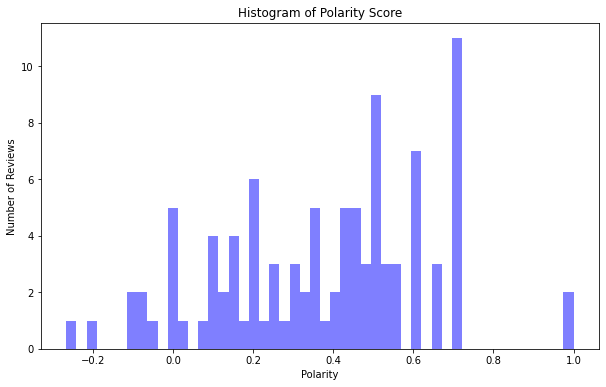

In [39]:
# Create quick lambda functions to find the polarity of each review
# Terminal / Anaconda Navigator: conda install -c conda-forge textblobfrom textblob import TextBlob
df['Text']= df['Text'].astype(str) #Make sure about the correct data type
pol = lambda x: TextBlob(x).sentiment.polarity
df['polarity'] = df['Text'].apply(pol) # depending on the size of your data, this step may take some time.
import matplotlib.pyplot as plt
import seaborn as sns
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show()

# Polarity Good/Bad Reviews

In [40]:
df['polarity'].value_counts()

0.700000    11
0.500000     8
0.600000     6
0.000000     5
0.533333     2
            ..
0.437500     1
0.138889     1
0.295000     1
0.440000     1
0.344444     1
Name: polarity, Length: 66, dtype: int64

# Stars and Polarity

In [41]:
pip install streamlit-echarts

Note: you may need to restart the kernel to use updated packages.


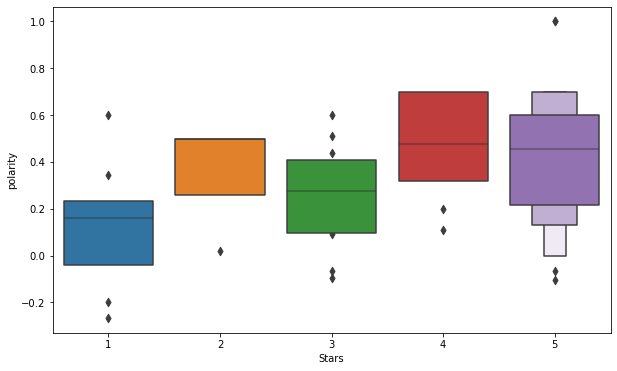

In [42]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='Stars', y='polarity', data=df)
plt.show();

In [43]:
df.loc[(df.polarity ==0 & (df.Stars == 4))].Text.tolist()

[' refresh keep bottle nightstand spray every night morning refresh scent',
 ' bit overprice regular thermal water',
 ' five star refresh',
 ' five star wife like',
 ' overprice market price']

In [44]:
df_bad_reviews = df[(df.polarity < 0)]
df_bad_reviews


,Stars,Text,stopwords,punctuation,numerics,upper,word_count,char_count,avg_word,polarity
6,1,spray defective waste spray get plug week way,9,2,0,0,9,46,4.7,-0.200000
10,5,soothe skin aid moisturizer application miner...,41,8,0,1,47,324,6.0,-0.105556
42,1,defective prayer stop spray correctly half st...,16,5,0,0,21,137,5.8,-0.041667
55,1,poor use several time stop spray water inside...,6,2,0,2,13,72,5.0,-0.266667
59,5,well brother think truly immediate effect dry...,6,1,0,2,10,55,5.1,-0.066667
75,3,refresh benefit bought base review read popul...,17,4,0,2,17,106,5.6,-0.096875
89,3,wouldn recommend moisturise dry skin wouldn r...,5,1,0,2,8,54,6.7,-0.066667


# Punctuation Vs Polarity

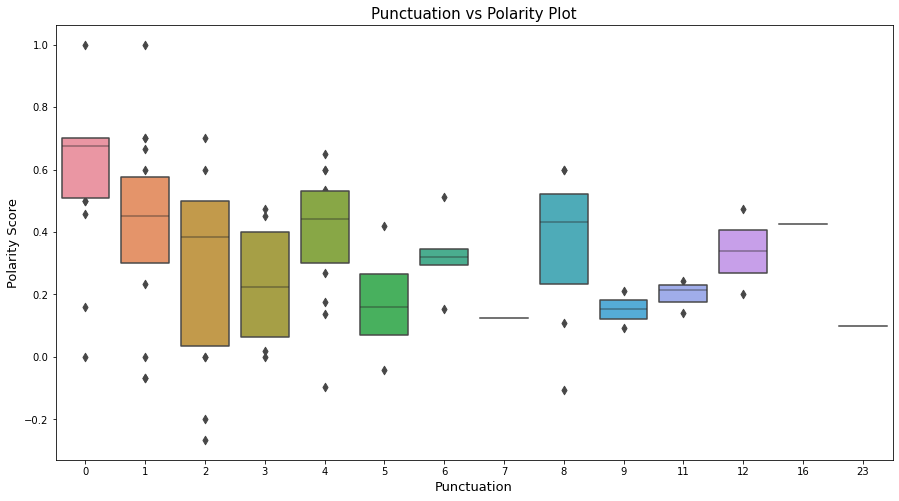

In [45]:
plt.figure(figsize=(15,8))
df3= df.loc[df.upper <= 50]
sns.boxenplot(x='punctuation', y='polarity', data=df3)
plt.xlabel('Punctuation', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Punctuation vs Polarity Plot', fontsize=15)
plt.show();

# Helpfulness vs Polarity

In [46]:
sub = lambda x: TextBlob(x).sentiment.subjectivity
df['subjectivity'] = df['Text'].apply(sub)
df.sample(10)

,Stars,Text,stopwords,punctuation,numerics,upper,word_count,char_count,avg_word,polarity,subjectivity
43,5,good picture,4,0,0,0,3,13,5.5,0.700000,0.600000
39,5,five star really good service fast delivery w...,7,2,0,0,14,74,4.7,0.383333,0.683333
5,5,nice mineral water supra love it face morning...,0,1,0,22,14,77,4.9,0.550000,0.800000
91,5,love fresh feel face honest know work fresh s...,16,16,0,5,23,135,5.1,0.426190,0.611905
27,5,cool refresh refresh especially morning start...,12,2,0,1,18,114,5.7,0.191667,0.537500
3,4,good thermal water spray great extra moisture,1,1,0,0,8,46,5.6,0.500000,0.483333
31,5,nice perfume skin feel fresh renovate,4,1,0,0,7,38,5.3,0.450000,0.750000
36,5,dry skin fortify useful hydrate dry skin spir...,9,6,0,0,17,94,4.9,0.345238,0.585714
33,5,perfect refresh face,0,0,0,0,4,21,6.0,1.000000,1.000000
86,5,like use make remove start use travel europe ...,34,7,0,4,29,156,4.6,0.125000,0.525000


Text(0.5, 1.0, 'Distribution of Subjectivity Score')

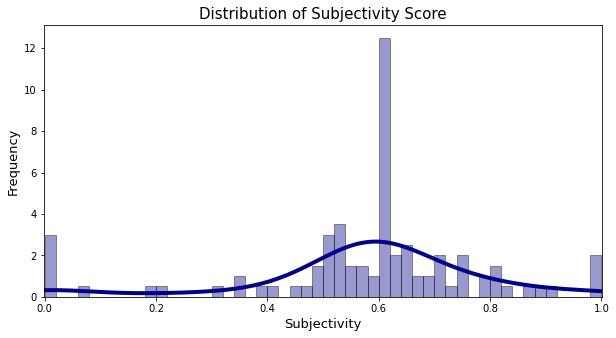

In [47]:
# Density Plot and Histogram of subjectivity
plt.figure(figsize=(10,5))
sns.distplot(df['subjectivity'], hist=True, kde=True,
bins=int(50), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)

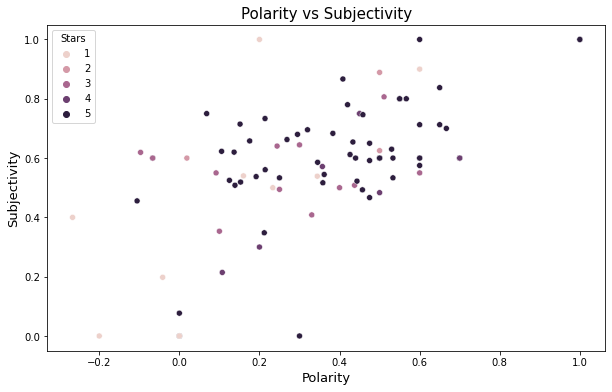

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='polarity', y='subjectivity', hue="Stars", data=df)
plt.xlabel('Polarity', fontsize=13)
plt.ylabel('Subjectivity', fontsize=13)
plt.title('Polarity vs Subjectivity', fontsize=15)
plt.show();

In [49]:
df2= pd.DataFrame()
for i in range (1,6):
  df2.loc[i,'polarity']= (df.loc[df.Stars == i].polarity.mean())
  df2.loc[i,'subjectivity']= (df.loc[df.Stars == i].subjectivity.mean())

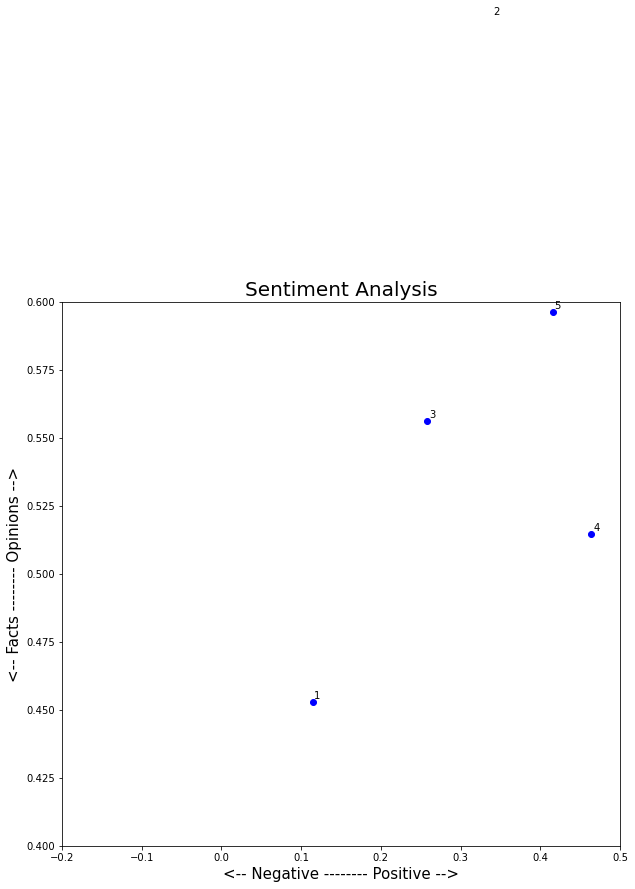

In [50]:
plt.rcParams['figure.figsize'] = [10, 10]

for index in range(1,6):
    x = df2.polarity.loc[index]
    y = df2.subjectivity.loc[index]
    plt.scatter(x, y, color='blue')
    plt.text(x+.002, y+.001, index, fontsize=10)
    plt.xlim(-0.2, 0.5) 
    plt.ylim(0.40, .6) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [51]:
df.to_csv('Analyzed_Data_Vichy.csv')

In [52]:
df

,Stars,Text,stopwords,punctuation,numerics,upper,word_count,char_count,avg_word,polarity,subjectivity
0,1,great cheap pack half bottle spray broke,3,1,0,0,8,41,4.9,0.344444,0.538889
1,5,love love,2,0,0,1,3,10,4.0,0.500000,0.600000
2,5,excellent water face fresh good,4,1,0,0,6,32,5.4,0.666667,0.700000
3,4,good thermal water spray great extra moisture,1,1,0,0,8,46,5.6,0.500000,0.483333
4,5,great size bag thermal water perfect everyday...,8,0,0,0,12,70,5.4,0.650000,0.837500
...,...,...,...,...,...,...,...,...,...,...,...
95,5,let car get hot effect love make face hydrate...,37,5,0,1,23,112,4.1,0.420000,0.780000
96,1,overprice market price,3,2,1,0,4,23,6.7,0.000000,0.000000
97,5,one definitely well actually must can live wi...,14,9,0,1,23,141,5.4,0.152814,0.519048
98,5,rich vow always love want sure get india star...,14,4,0,2,13,65,4.4,0.458333,0.746296


In [53]:
count_stars = df.groupby(df.Stars, as_index = False).agg({'Text':'count'})


In [59]:
count_stars

,Stars,Text
0,1,9
1,2,3
2,3,12
3,4,8
4,5,68


In [57]:
data.shape


(160, 3)

In [58]:
data_trans.shape

(100, 3)

# EDA ANG GRAPHS

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt 


Text(0.5, 1.0, 'average words')

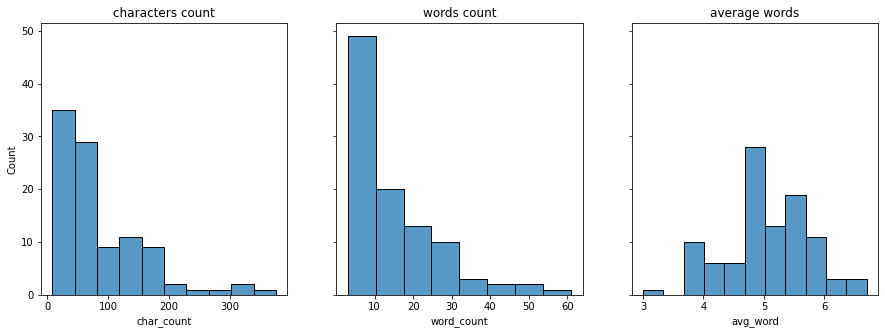

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
#fig.suptitle('words')

#nb characters
sns.histplot(ax=axes[0], data=df, x=df.char_count)
axes[0].set_title('characters count')

# word count
sns.histplot(ax=axes[1], data=df, x=df.word_count)
axes[1].set_title('words count')

# avg word
sns.histplot(ax=axes[2], data=df, x=df.avg_word) 
axes[2].set_title('average words')

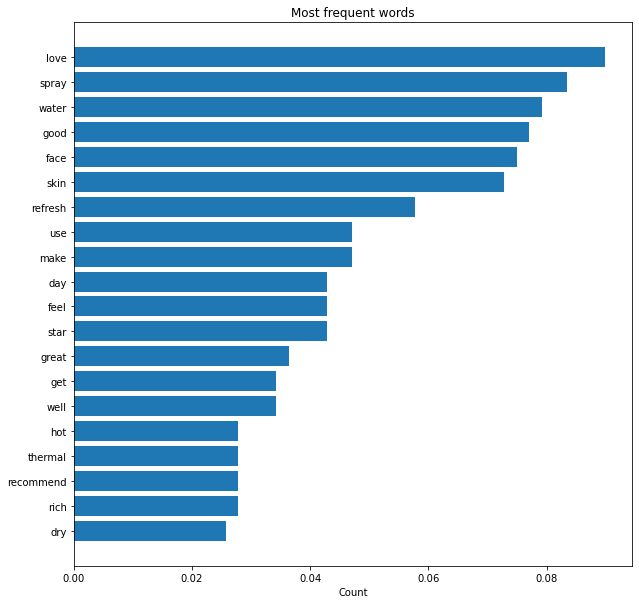

In [67]:
from nltk import FreqDist

good_polarity_reviews = df[df.polarity > 0.7]

def freq_words(x):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    
    d = words_df.nlargest(columns="count", n=20)
    d = d.sort_values(by='count', ascending=True)
    d['freq_rel'] = d['count']/(sum(d['count']))
    plt.barh(d.word,d['freq_rel'])
    plt.title('Most frequent words')
    plt.xlabel('Count')
    plt.show()
    
freq_words(df.Text)

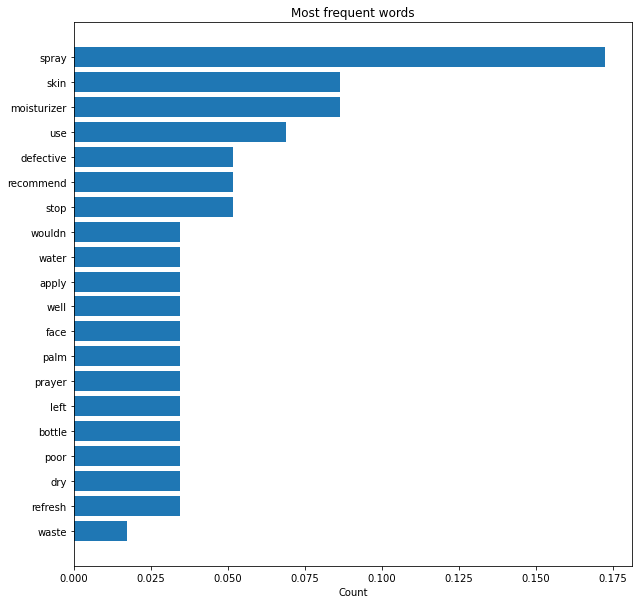

In [68]:
good_polarity_reviews = df[df.polarity < 0]
freq_words(good_polarity_reviews.Text)

# Rating

In [69]:
count_stars = df.groupby(df.Stars, as_index = False).count()
count_stars

,Stars,Text,stopwords,punctuation,numerics,upper,word_count,char_count,avg_word,polarity,subjectivity
0,1,9,9,9,9,9,9,9,9,9,9
1,2,3,3,3,3,3,3,3,3,3,3
2,3,12,12,12,12,12,12,12,12,12,12
3,4,8,8,8,8,8,8,8,8,8,8
4,5,68,68,68,68,68,68,68,68,68,68


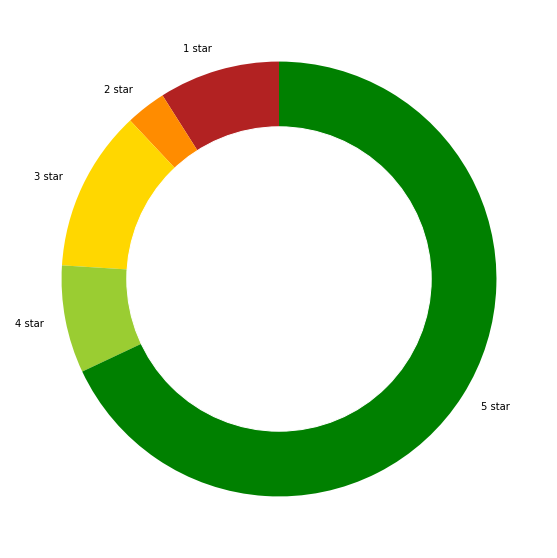

In [70]:
count_stars = df.groupby(df.Stars, as_index = False).count()

names = ['1 star','2 star','3 star','4 star','5 star']
plt.pie(count_stars.Text, labels=names, colors=['firebrick','darkorange','gold','yellowgreen','green'], startangle=90)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')

p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

# Wordcount

# Good reviews

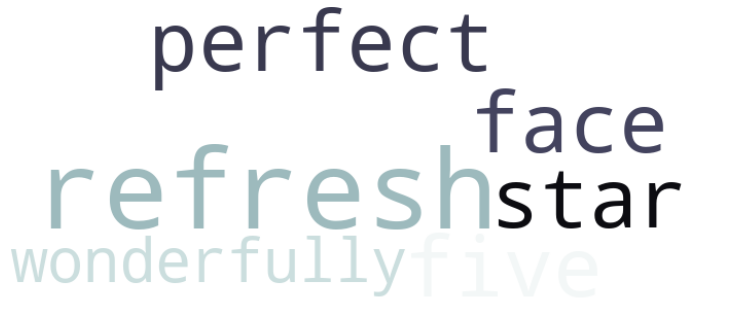

In [71]:
# create corpus good reviews
df_good_reviews = df[(df.polarity >0.7)]
corpus_good_reviews =[]
# split each words comment in a list
corpus_good_reviews = df_good_reviews['Text'].str.split()

# add all splitted words in a list
corpus_good_reviews = corpus_good_reviews.values.tolist()
corpus_good_reviews = [word for i in corpus_good_reviews for word in i]

# unify corpus in one element
words_good = '' 
words_good += " ".join(corpus_good_reviews)+" "

# add stopwords
stopwords=set(['use','product','come','can'])


#pic = np.array(Image.open(requests.get('http://cliparts/8/4/s/A/p/8/thumb-up-md.png',stream=True).raw))

# wordcloud : see the most frequent words (visualization)
wordcloud = WordCloud(width = 700, height = 300, background_color ='white', stopwords=stopwords, 
             min_font_size=10, colormap='bone').generate(words_good)

# plot
plt.figure(figsize = (10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Bad Reviews

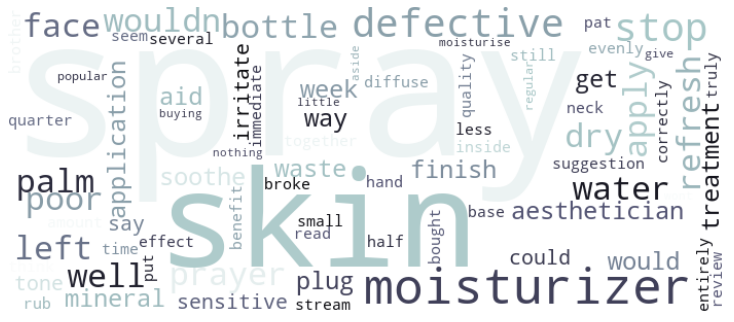

In [73]:
# create corpus bad reviews
df_bad_reviews = df[(df.polarity <0)]

# split each words comment in a list
corpus_bad_reviews =[]
corpus_bad_reviews = df_bad_reviews['Text'].str.split()

# add all splitted words in a list
corpus_bad_reviews = corpus_bad_reviews.values.tolist()
corpus_bad_reviews = [word for i in corpus_bad_reviews for word in i]
# unify in one element
words_bad = '' 
words_bad += " ".join(corpus_bad_reviews)+" "
# add stopwords
stopwords=set(['use','product','come','can'])
#pic = np.array(Image.open(requests.get('http://www.clker.com/cliparts/5/5/d/6/1194989754480445982tiger_graig_ryan_smith_-_01.svg.med.png',stream=True).raw))
# wordcloud : see the most frequent words (visualization)
wordcloud = WordCloud(width=700, height=300, background_color='white', stopwords=stopwords, 
                min_font_size=10, colormap='bone').generate(words_bad)
# plot
plt.figure(figsize = (10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()